In [4]:
#%pip install ipywidgets
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

mass_sun = 1.989e30   # kg
mass_earth = 5.97e24  # kg
mass_mars = 6.418e23  # kg
mass_venus = 4.867E24 # kg

G = 6.67430e-11  # m^3 kg^-1 s^-2

# distances
AU = 149e9         #m

v_earth = 29.78e3    # m/s
r_earth = AU         # m 

v_mars = 24.07e3     # m/s
r_mars = 1.5*AU      # m

v_venus = 35.02e3    # m/s
r_venus = .726*AU

# settings
dt = 24 * 3600  # seconds
t = 687 * 24 * 3600  # seconds
N = int(t / dt)

# Ic.
v_e = np.zeros((N,2))
v_e[0,:] = [0,v_earth]

r_e = np.zeros((N,2))
r_e[0,:] = [r_earth,0]

v_m = np.zeros((N,2))
v_m[0,:] = [0,v_mars]

r_m = np.zeros((N,2))
r_m[0,:] = [r_mars,0]

v_v = np.zeros((N,2))
v_v[0,:] = [0,v_venus]

r_v = np.zeros((N,2))
r_v[0,:] = [r_venus,0]



t_arr = np.linspace(0,t+dt,N)

In [ ]:
def acceleration(r):
    r_norm = np.linalg.norm(r)
    return -G * mass_sun * r / r_norm**3

def rk4_orbit(r_array, v_array, N, dt):
    for i in range(1, N):
        r0 = r_array[i - 1, :]
        v0 = v_array[i - 1, :]

        # k1
        k1_v = acceleration(r0) * dt
        k1_r = v0 * dt

        # k2
        k2_v = acceleration(r0 + 0.5 * k1_r) * dt
        k2_r = (v0 + 0.5 * k1_v) * dt

        # k3
        k3_v = acceleration(r0 + 0.5 * k2_r) * dt
        k3_r = (v0 + 0.5 * k2_v) * dt

        # k4
        k4_v = acceleration(r0 + k3_r) * dt
        k4_r = (v0 + k3_v) * dt

        # update
        v_array[i, :] = v0 + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6
        r_array[i, :] = r0 + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6


rk4_orbit(r_e, v_e, N, dt)  # Earth
rk4_orbit(r_m, v_m, N, dt)  # Mars
rk4_orbit(r_v, v_v, N, dt)  # Venus


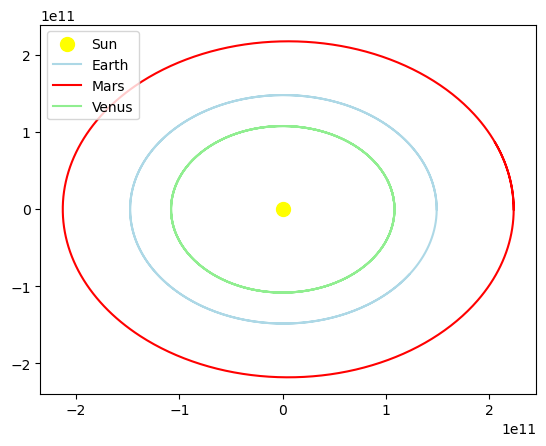

In [13]:
# Plotting the trajectory
plt.figure()
plt.scatter(0, 0, color='yellow', s=100, label='Sun')  # Sun at origin
plt.plot(r_e[:, 0], r_e[:, 1], label='Earth', color='lightblue')
plt.plot(r_m[:, 0], r_m[:, 1], label='Mars', color='red')
plt.plot(r_v[:, 0], r_v[:, 1], label='Venus', color='lightgreen')
plt.legend(loc='upper left')
plt.show()

In [19]:
def sim_kep(t_sim):

    plt.figure(figsize=(6, 6))
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')

    plt.plot(r_e[:, 0], r_e[:, 1], label='Earth', color='lightgray')
    plt.plot(r_m[:, 0], r_m[:, 1], label='Mars', color='lightgray')
    plt.plot(r_v[:, 0], r_v[:, 1], label='Venus', color='lightgray')

    # plt.plot(r_h[N, 0], r_h[N, 1], 'r.')

    plt.scatter(0, 0, color='yellow', s=100, label='Sun')  # Sun at origin
    plt.gca().set_aspect('equal')
    plt.title('Venus, Earth & Mars Trajectory Around the Sun')


    for i in range(1,t_sim,int(N/15)):
        plt.plot(r_e[:i, 0], r_e[:i, 1], label='Earth Trajectory', color='black')
        plt.plot(r_m[:i, 0], r_m[:i, 1], label='Mars Trajectory', color='black')
        plt.plot(r_v[:i, 0], r_v[:i, 1], label='Mars Trajectory', color='black')
        
        plt.plot(r_e[i, 0], r_e[i, 1], 'b.')
        plt.plot(r_m[i, 0], r_m[i, 1], 'r.')
        plt.plot(r_v[i, 0], r_v[i, 1], 'g.')

    plt.text(0,1e11, str(int(t_sim))+'days')
    plt.grid()
    #plt.legend()
    plt.show()

interact(sim_kep, t_sim=widgets.IntSlider(min=0, max=N-1, step=int(N/15), value=1))

interactive(children=(IntSlider(value=1, description='t_sim', max=686, step=45), Output()), _dom_classes=('wid…

<function __main__.sim_kep(t_sim)>

In [ ]:
def sim_kep(t_sim):

    plt.figure(figsize=(6, 6))
    plt.xlabel('X Position (m)')
    plt.ylabel('Y Position (m)')

    #plt.plot(r_e[:, 0], r_e[:, 1], label='Earth Trajectory', color='lightgray')
    plt.plot(-r_e[:, 0], -r_e[:, 1], label='Sun\'s Trajectory as observed from earth', color='lightgray')
    plt.plot(r_m[:, 0]-r_e[:, 0], r_m[:, 1]-r_e[:, 1], label='Mars Trajectory as observed from earth', color='lightgray')
    plt.plot(r_v[:, 0]-r_e[:, 0], r_v[:, 1]-r_e[:, 1], label='Venus Trajectory as observed from earth', color='lightgray')
    
    # plt.plot(r_h[N, 0], r_h[N, 1], 'r.')

    plt.scatter(0, 0, color='blue', s=100, label='Earth')  # Sun at origin
    plt.gca().set_aspect('equal')
    plt.title('Sun & Mars Trajectory as observed from earth')


    for i in range(1,t_sim,int(N/15)):
        plt.plot(-r_e[:i, 0], -r_e[:i, 1], label='Earth Trajectory', color='yellow')
        plt.plot(r_m[:i, 0]-r_e[:i, 0], r_m[:i, 1]-r_e[:i, 1], label='Mars Trajectory', color='red')
        plt.plot(r_v[:i, 0]-r_e[:i, 0], r_v[:i, 1]-r_e[:i, 1], label='Mars Trajectory', color='green')
        
        plt.plot(-r_e[i, 0], -r_e[i, 1], 'y.')
        plt.plot(r_m[i, 0]-r_e[i, 0], r_m[i, 1]-r_e[i, 1], 'r.')
        plt.plot(r_v[i, 0]-r_e[i, 0], r_v[i, 1]-r_e[i, 1], 'g.')
        

    plt.text(0,1e11, str(int(t_sim))+'days')
    plt.grid()
    #plt.legend()
    plt.show()

interact(sim_kep, t_sim=widgets.IntSlider(min=0, max=N-1, step=int(N/15), value=1))

interactive(children=(IntSlider(value=1, description='t_sim', max=686, step=45), Output()), _dom_classes=('wid…

<function __main__.sim_kep(t_sim)>

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def sim_kep(t_sim):

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # === PANEEL 1: Absolute banen === #
    ax = axs[0]
    ax.set_title('Absolute Trajectories')
    ax.set_xlabel('X Position (m)')
    ax.set_ylabel('Y Position (m)')
    ax.set_aspect('equal')
    ax.grid(True)

    # full trajectory
    ax.plot(r_e[:, 0], r_e[:, 1], color='lightgray', label='Earth')
    ax.plot(r_m[:, 0], r_m[:, 1], color='lightgray', label='Mars')
    ax.plot(r_v[:, 0], r_v[:, 1], color='lightgray', label='Venus')
    ax.scatter(0, 0, color='yellow', s=100, label='Sun')

    # color trajectory
    for i in range(1, t_sim, int(N/15)):
        ax.plot(r_e[:i, 0], r_e[:i, 1], color='blue')
        ax.plot(r_m[:i, 0], r_m[:i, 1], color='red')
        ax.plot(r_v[:i, 0], r_v[:i, 1], color='green')

        ax.plot(r_e[i, 0], r_e[i, 1], 'b.')
        ax.plot(r_m[i, 0], r_m[i, 1], 'r.')
        ax.plot(r_v[i, 0], r_v[i, 1], 'g.')

    ax.plot(r_e[t_sim-int(N/15), 0], r_e[t_sim-int(N/15), 1], 'b.', markersize='15')
    ax.plot(r_m[t_sim-int(N/15), 0], r_m[t_sim-int(N/15), 1], 'r.', markersize='15')
    ax.plot(r_v[t_sim-int(N/15), 0], r_v[t_sim-int(N/15), 1], 'g.', markersize='15')

    ax.text(0, 1e11, f"{int(t_sim)} dagen", fontsize=10)


    # === PANEEL 2: Relatieve banen tov aarde === #
    ax = axs[1]
    ax.set_title('As Observed from Earth')
    ax.set_xlabel('X Position (m)')
    ax.set_ylabel('Y Position (m)')
    ax.set_aspect('equal')
    ax.grid(True)

    ax.plot(-r_e[:, 0], -r_e[:, 1], color='lightgray', label='Sun (from Earth)')
    ax.plot(r_m[:, 0] - r_e[:, 0], r_m[:, 1] - r_e[:, 1], color='lightgray', label='Mars (from Earth)')
    ax.plot(r_v[:, 0] - r_e[:, 0], r_v[:, 1] - r_e[:, 1], color='lightgray', label='Venus (from Earth)')
    ax.scatter(0, 0, color='blue', s=100, label='Earth')

    for i in range(1, t_sim, int(N/15)):
        ax.plot(-r_e[:i, 0], -r_e[:i, 1], color='yellow')
        ax.plot(r_m[:i, 0] - r_e[:i, 0], r_m[:i, 1] - r_e[:i, 1], color='red')
        ax.plot(r_v[:i, 0] - r_e[:i, 0], r_v[:i, 1] - r_e[:i, 1], color='green')

    ax.plot(-r_e[t_sim-int(N/15), 0], -r_e[t_sim-int(N/15), 1], 'y.', markersize='10')
    ax.plot(r_m[t_sim-int(N/15), 0] - r_e[t_sim-int(N/15), 0], r_m[t_sim-int(N/15), 1] - r_e[t_sim-int(N/15), 1], 'r.', markersize='18')
    ax.plot(r_v[t_sim-int(N/15), 0] - r_e[t_sim-int(N/15), 0], r_v[t_sim-int(N/15), 1] - r_e[t_sim-int(N/15), 1], 'g.', markersize='3')

    ax.text(0, 1e11, f"{int(t_sim)} dagen", fontsize=10)

    plt.tight_layout()
    plt.legend()
    plt.show()


# slider to animate
interact(sim_kep, t_sim=IntSlider(min=1, max=N-1, step=int(N/15), value=1))


interactive(children=(IntSlider(value=1, description='t_sim', max=686, min=1, step=45), Output()), _dom_classe…

<function __main__.sim_kep(t_sim)>